In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np


iris = load_iris()

X = iris.data  
y = iris.target  

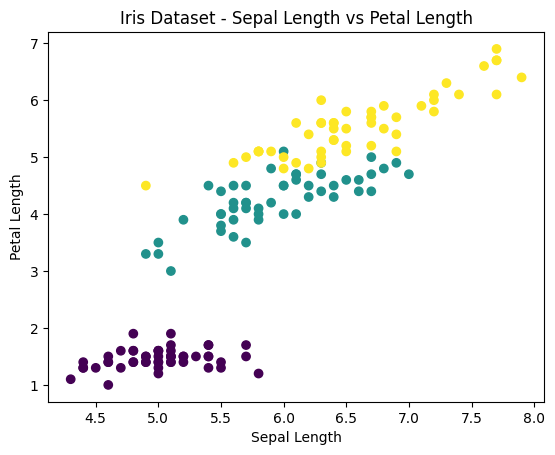

In [2]:
plt.scatter(X[:, 0], X[:, 2], c=y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Iris Dataset - Sepal Length vs Petal Length')
plt.show()

In [55]:
def initialize_population(num_population, k, num_datapoints):
    population = []
    for _ in range(num_population):
        data = np.random.randint(1, k + 1, size=num_datapoints)
        population.append(data)
    return population

def calculate_cluster_centroids(X, data, k):
    centroids = []
    for i in range(1, k + 1):
        cluster_points = X[data == i]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    return centroids

def calculate_cluster_variances(X, data, centroids, k):
    variances = []
    for i in range(1, k + 1):
        cluster_points = X[data == i]
        centroid = centroids[i - 1]
        variance = np.mean(np.linalg.norm(cluster_points - centroid, axis=1) ** 2)
        variances.append(variance)
    return variances

def calculate_population_fitness(X, population, k):
    fitnesses = []
    for data in population:
        centroids = calculate_cluster_centroids(X, data, k)
        variances = calculate_cluster_variances(X, data, centroids, k)
        weights = np.array([len(X[data == i]) for i in range(1, k + 1)]) / len(X)
        fitness = np.dot(weights , (1 / (np.array(variances) + 1)))
        fitnesses.append(fitness)
    return fitnesses,variances

def select_parents(population,fitnesses, num_parents):
    fitness_sum = np.sum(fitnesses)
    probabilities = fitnesses / fitness_sum
    if np.isnan(probabilities).any():
        print("pi")

    parent_indices = np.random.choice(len(fitnesses), size=num_parents, replace=False, p=probabilities)
    return [population[idx] for idx in parent_indices]

def crossover(parents):
    crossover_point = len(parents[0]) // 2
    child1 = np.concatenate((parents[0][:crossover_point], parents[1][crossover_point:]))
    child2 = np.concatenate((parents[1][:crossover_point], parents[0][crossover_point:]))
    return child1, child2

def mutate(X,child, centroids, mutation_prob):
    if np.nan_to_num(np.random.random()) < mutation_prob:
        random_index = np.random.randint(len(child))
        point = X[random_index]
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        closest_cluster = np.argmin(distances) + 1
        child[random_index] = closest_cluster
    return child


In [60]:
def evolution(X,num_population, k, num_datapoints, num_parents, num_generations, mutation_prob):
    population = initialize_population(num_population, k, num_datapoints)
    best_variances = []

    initial_fitnesses , initial_variances = calculate_population_fitness(X, population, k)
    initial_variance = np.min(initial_variances)
    best_variance = initial_variance
    best_index = np.argmin(initial_variances)
    best_clusters = population[best_index]
    best_centroids = calculate_cluster_centroids(X, best_clusters, k)

    n_generation = 0
    for x in range(num_generations):
        fitnesses,variances = calculate_population_fitness(X, population, k)
        new_population = []
        
        parents_list = []
        for _ in range(num_population // 2):
            parents = select_parents(population, fitnesses, num_parents)
            parents_reverse = parents[::-1]
            while(tuple(parents) in parents_list):
                parents = select_parents(population, fitnesses, num_parents)
                parents_reverse = parents[::-1]

            parents_list.append(parents)
            parents_list.append(parents_reverse)

            children = [child for child in crossover(parents)]
            children = [mutate(X,child, best_centroids, mutation_prob) for child in children]
            new_population.extend(children)

        population = new_population
        best_generation_variance = np.min(variances)
        best_variances.append(best_generation_variance)
        
        if best_generation_variance < best_variance:
            best_variance = best_generation_variance
            best_index = np.argmin(variances)
            best_clusters = population[best_index]
            best_centroids = calculate_cluster_centroids(X, best_clusters, k)
            n_generation = x
    

    print( "Best Variance : " , best_variance)
    print("Generation : ",n_generation)
    return best_clusters, best_centroids, best_variances

Best Variance :  0.4870333333333334
Generation :  893


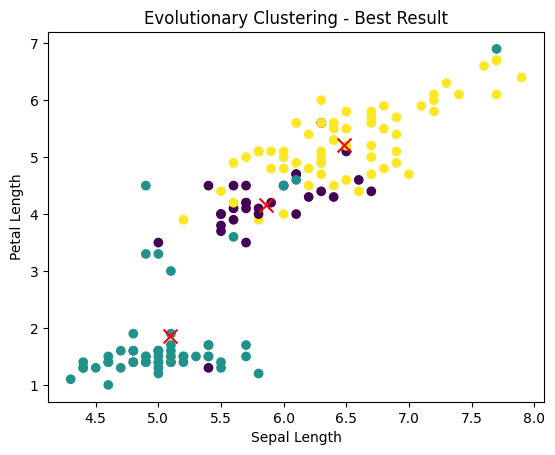

In [61]:
num_population = 10
k = 3
num_datapoints = len(X)
num_parents = 2
num_generations = 1000
mutation_prob = 0.35

best_clusters, best_centroids, best_variances = evolution(X, num_population, k, num_datapoints, num_parents, num_generations, mutation_prob)


plt.scatter(X[:, 0], X[:, 2], c=best_clusters, cmap='viridis')
plt.scatter(np.array(best_centroids)[:, 0], np.array(best_centroids)[:, 2], marker='x', color='red', s=100)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Evolutionary Clustering - Best Result')
plt.show()

Best Variance :  0.8487801652892564
Generation :  962


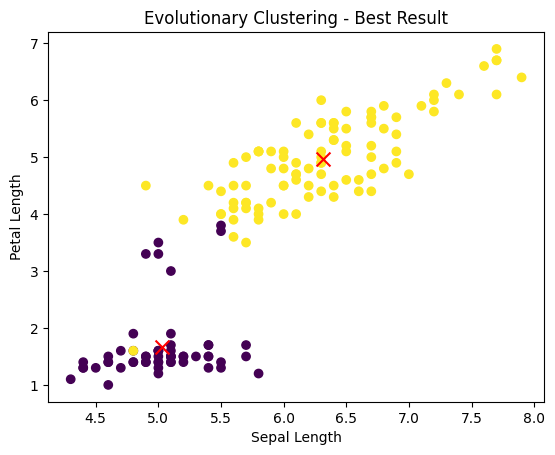

In [62]:
num_population = 10
k = 2
num_datapoints = len(X)
num_parents = 2
num_generations = 1000
mutation_prob = 0.35

best_clusters, best_centroids, best_variances = evolution(X, num_population, k, num_datapoints, num_parents, num_generations, mutation_prob)


plt.scatter(X[:, 0], X[:, 2], c=best_clusters, cmap='viridis')
plt.scatter(np.array(best_centroids)[:, 0], np.array(best_centroids)[:, 2], marker='x', color='red', s=100)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Evolutionary Clustering - Best Result')
plt.show()

Best Variance :  0.2845061728395061
Generation :  958


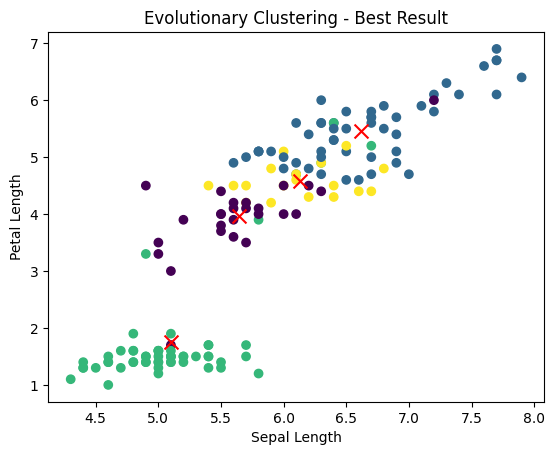

In [64]:
num_population = 10
k = 4
num_datapoints = len(X)
num_parents = 2
num_generations = 1000
mutation_prob = 0.35

best_clusters, best_centroids, best_variances = evolution(X, num_population, k, num_datapoints, num_parents, num_generations, mutation_prob)


plt.scatter(X[:, 0], X[:, 2], c=best_clusters, cmap='viridis')
plt.scatter(np.array(best_centroids)[:, 0], np.array(best_centroids)[:, 2], marker='x', color='red', s=100)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Evolutionary Clustering - Best Result')
plt.show()

Best Variance :  0.2955273879583522
Generation :  796


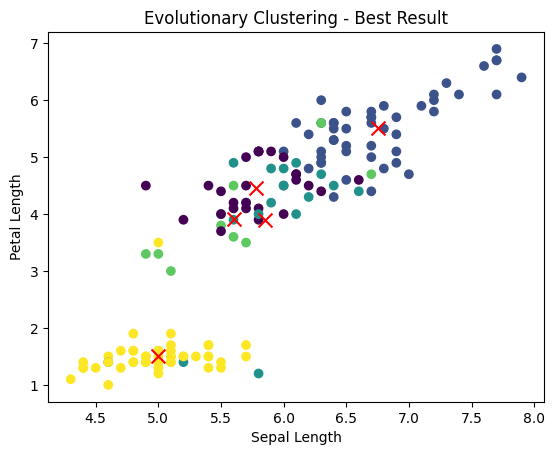

In [65]:
num_population = 10
k = 5
num_datapoints = len(X)
num_parents = 2
num_generations = 1000
mutation_prob = 0.35

best_clusters, best_centroids, best_variances = evolution(X, num_population, k, num_datapoints, num_parents, num_generations, mutation_prob)


plt.scatter(X[:, 0], X[:, 2], c=best_clusters, cmap='viridis')
plt.scatter(np.array(best_centroids)[:, 0], np.array(best_centroids)[:, 2], marker='x', color='red', s=100)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Evolutionary Clustering - Best Result')
plt.show()